<a href="https://colab.research.google.com/github/TheBoy-WhoCode/fake-news-detection/blob/master/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 67kB/s 
     |████████████████████████████████| 3.8MB 43.7MB/s 
     |████████████████████████████████| 450kB 49.4MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
!unzip /content/fake-news.zip

Archive:  /content/fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [4]:
train = pd.read_csv("/content/train.csv", sep=",")
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
test = pd.read_csv("/content/test.csv", sep=",")
test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [0]:
train_copy = train.copy()
test_copy = test.copy()

In [0]:
train_copy = train_copy.set_index('id', drop=True)

In [8]:
train_copy.shape

(20800, 4)

In [9]:
train_copy.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [10]:
test_copy.shape

(5200, 4)

In [11]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


In [12]:
train_copy.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
train_copy[['title', 'author']] = train_copy[['title', 'author']].fillna(value = 'Missing')
train_copy = train.dropna()
train_copy.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [14]:
length = []
[length.append(len(str(text))) for text in train_copy['text']]
train_copy['length'] = length
train_copy.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,1192
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,4923
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,10261
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0,9400
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0,3132


In [15]:
min(train_copy['length'])

1

In [16]:
max(train_copy['length'])

142961

In [17]:
round(sum(train_copy['length'])/len(train_copy['length']))

4800

In [18]:
len(train_copy[train_copy['length'] < 50])

107

In [19]:
train_copy['text'][train_copy['length'] < 50 ] 

82                                                        
169                                                       
173                                        Guest   Guest  
295                                                       
470                                                       
                               ...                        
20264                                                     
20348    \n\nMindblowing Reason Elites Fear Donald Trum...
20418                                      Guest   Guest  
20431         \nOctober 28, 2016 The Mothers by stclair by
20513                                                     
Name: text, Length: 107, dtype: object

In [0]:
train_copy = train_copy.drop(train_copy['text'][train_copy['length'] < 50 ].index
                             , axis=0)

In [21]:
min(train_copy['length']), max(train_copy['length']), max(train_copy['length'])

(51, 142961, 142961)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 4800, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split = ' ' )
tokenizer.fit_on_texts(texts = train_copy['text'])
x = tokenizer.texts_to_sequences(texts = train_copy['text'])

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x = pad_sequences(sequences = x, maxlen = 4800, padding='pre')

In [24]:
print(x.shape)

(18178, 4800)


In [25]:
y = train_copy['label'].values
print(y.shape)

(18178,)


In [0]:
#Spliting Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 14)

In [27]:
x_train.shape

(14542, 4800)

In [0]:
#Creating Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RNN, SpatialDropout1D, Embedding
lstm_model = Sequential()
lstm_model.add(layer = Embedding(input_dim = 4800, output_dim = 120))
lstm_model.add(layer = LSTM(units = 120, dropout=0.2, recurrent_dropout = 0.2))
lstm_model.add(layer = Dropout(rate=0.5))
lstm_model.add(layer = Dense(units = 120, activation='relu'))
lstm_model.add(layer = Dropout(rate=0.5))
lstm_model.add(layer = Dense(units = len(set(y)), activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [29]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         576000    
_________________________________________________________________
lstm (LSTM)                  (None, 120)               115680    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 242       
Total params: 706,442
Trainable params: 706,442
Non-trainable params: 0
__________________________________________________

In [30]:
lstm_model_fit = lstm_model.fit(x_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

Train on 13087 samples, validate on 1455 samples
13087/13087 [==============================] - 4773s 365ms/sample - loss: 0.3764 - accuracy: 0.8335 - val_loss: 0.2390 - val_accuracy: 0.8948


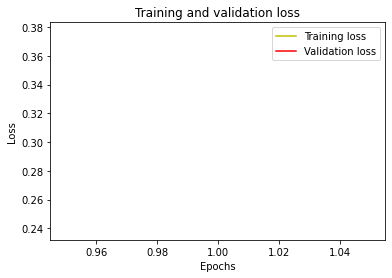

In [33]:
import matplotlib.pyplot as plt
loss = lstm_model_fit.history['loss']
val_loss = lstm_model_fit.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()